In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
health_data = pd.read_csv("C:\\Users\\susen\\Downloads\\healthcare medical project dataset\\healthcare-dataset-stroke-data.csv")
health_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [21]:
health_data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [22]:
health_data.shape

(5110, 12)

In [23]:
health_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [24]:
health_data.drop(["id"], axis=1, inplace=True)

In [25]:
health_data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [26]:
health_data[health_data.duplicated()]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [27]:
health_data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [28]:
health_data["bmi"].mean()

28.893236911794666

In [29]:
health_data["bmi"] = health_data["bmi"].fillna(health_data["bmi"].mean())

In [30]:
health_data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# visualization of categorical columns:

In [31]:
qual_columns = health_data.select_dtypes(exclude=np.number).columns
qual_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

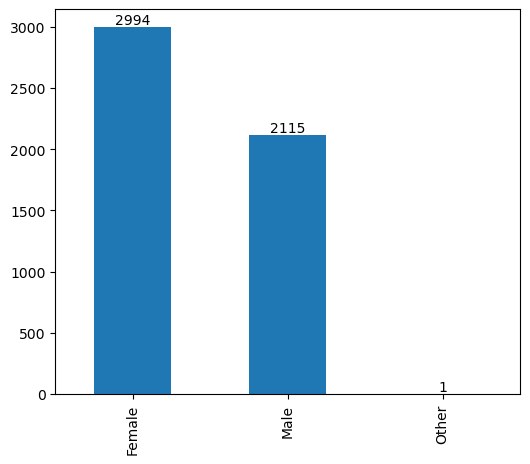

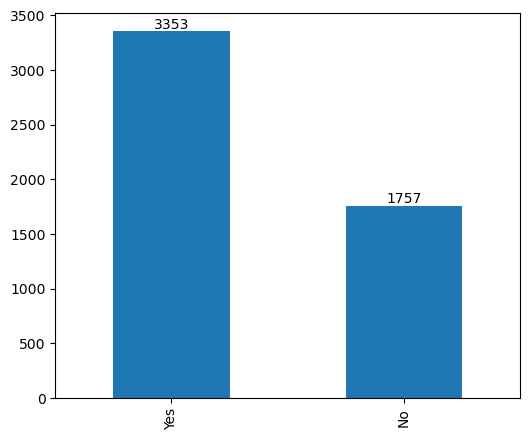

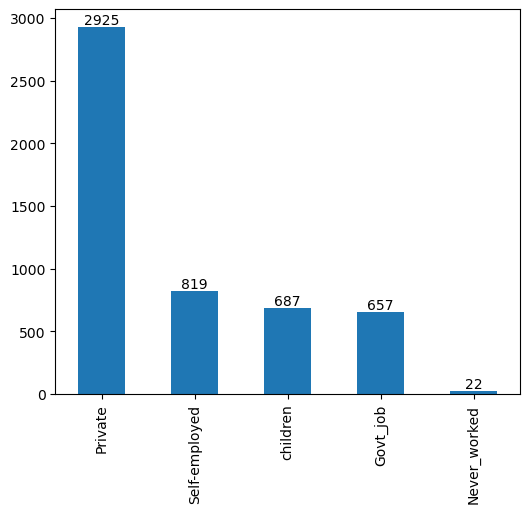

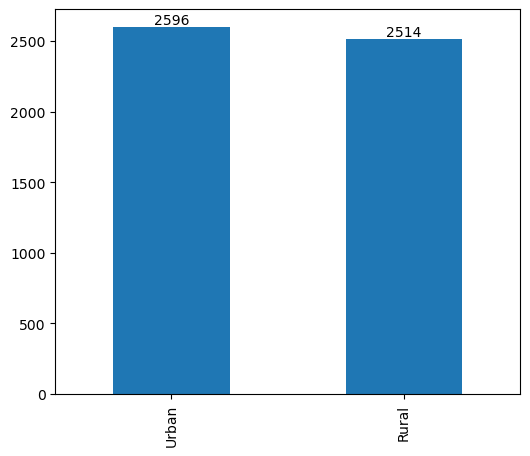

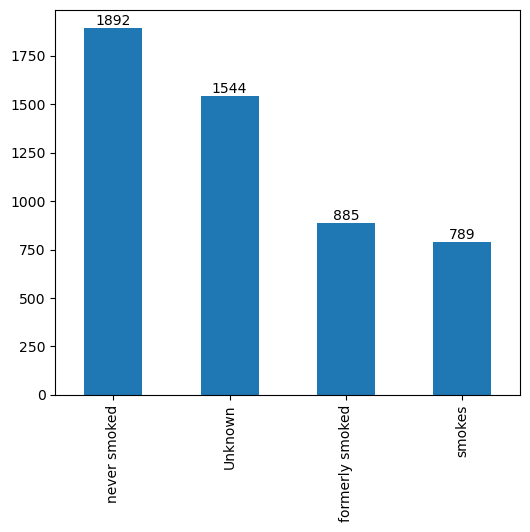

In [32]:
for col in qual_columns:
    plt.figure(figsize=(6,5))
    bx=health_data[col].value_counts().plot(kind="bar")
    for i in bx.containers:
        bx.bar_label(i)
    plt.show()

# visualization of numerical columns:

In [33]:
quan_columns = health_data.select_dtypes(include=np.number).columns
quan_columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [34]:
quan_cols = ["age","avg_glucose_level","bmi"]

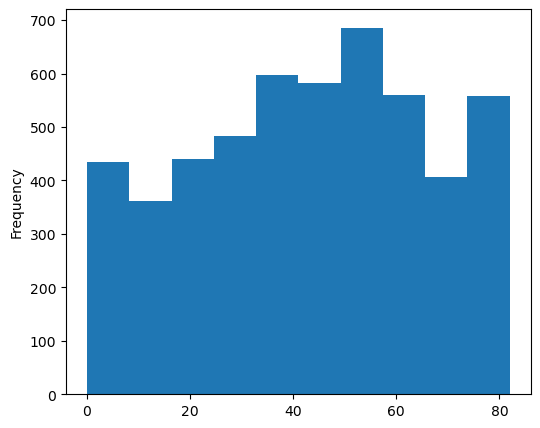

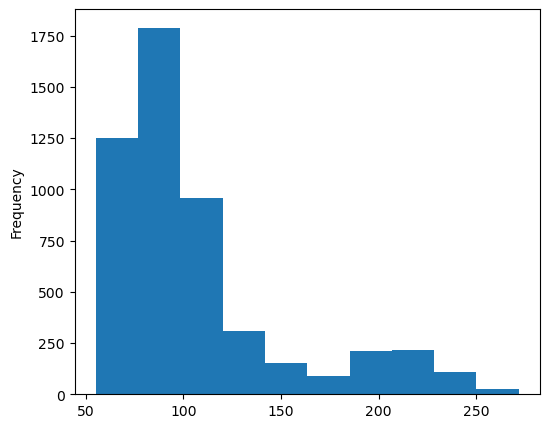

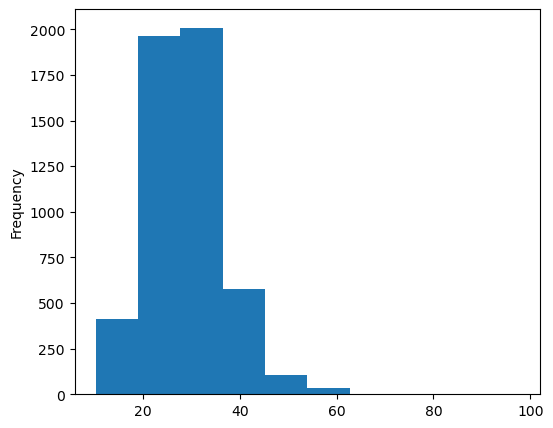

In [35]:
for col in quan_cols:
    plt.figure(figsize=(6,5))
    health_data[col].plot(kind="hist")
    for i in bx.containers:
        bx.bar_label(i)
    plt.show()

# Boxplot

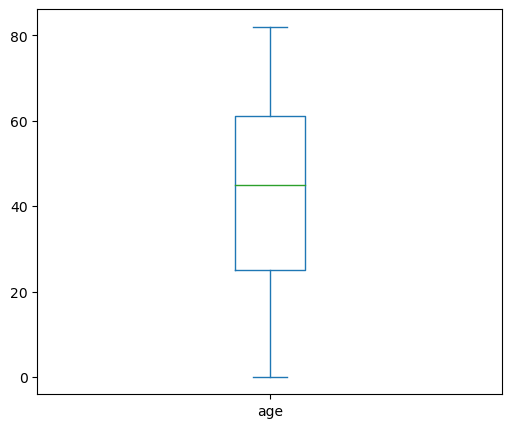

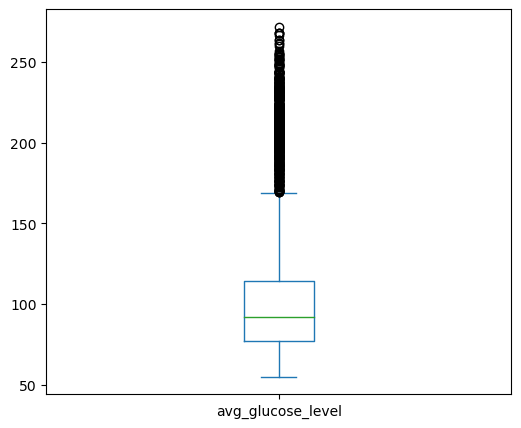

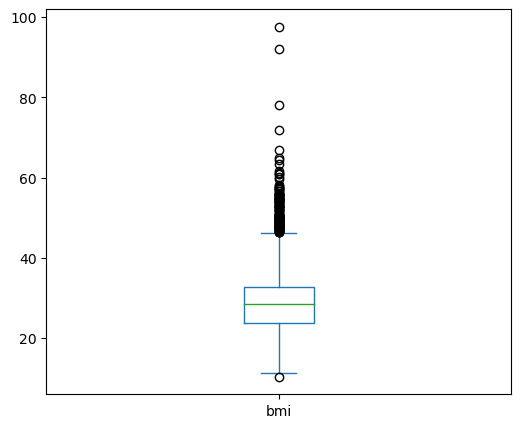

In [36]:
for col in quan_cols:
    plt.figure(figsize=(6,5))
    health_data[col].plot(kind="box")
    for i in bx.containers:
        bx.bar_label(i)
    plt.show()

# scatter plot - correlation among Numeric variables

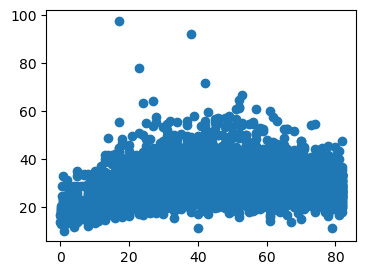

In [37]:
plt.figure(figsize=(4,3))
plt.scatter(x=health_data.age, y=health_data.bmi)
plt.show()

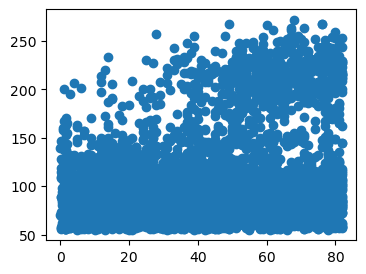

In [38]:
plt.figure(figsize=(4,3))
plt.scatter(x=health_data.age, y=health_data.avg_glucose_level)
plt.show()

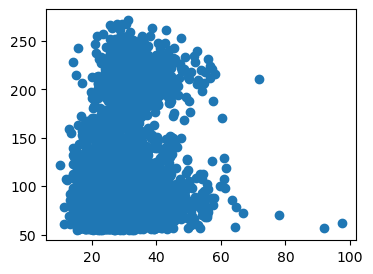

In [39]:
plt.figure(figsize=(4,3))
plt.scatter(x=health_data.bmi, y=health_data.avg_glucose_level)
plt.show()

# correlation matrix

In [40]:
cor_matrix=health_data[quan_columns].corr()
cor_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<Axes: >

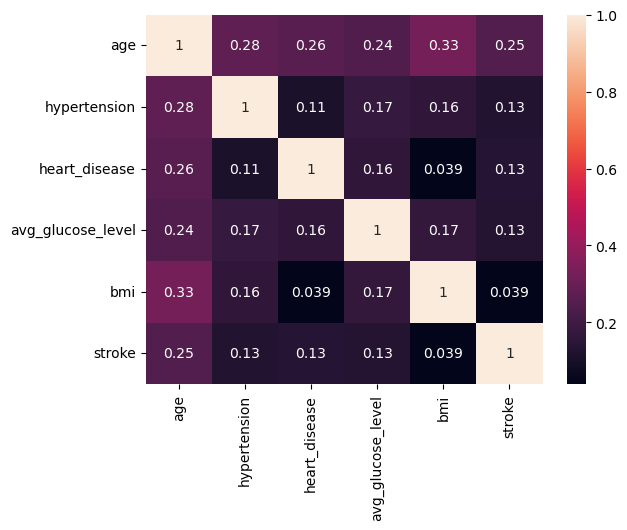

In [41]:
sns.heatmap(cor_matrix, annot=True)

In [42]:
health_data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [43]:
health_data.shape

(5110, 11)

In [45]:
health_data.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

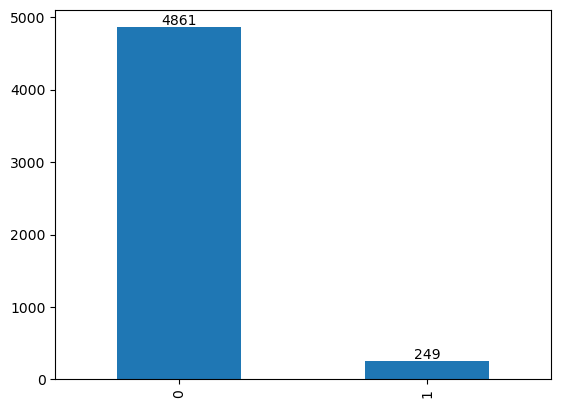

In [46]:
ax = health_data.stroke.value_counts().plot(kind="bar")
for i in ax.containers:
    ax.bar_label(i)

In [47]:
stroke_df = health_data[health_data['stroke'] == 1]
stroke_df.shape

(249, 11)

In [48]:
No_stroke_df = health_data[health_data['stroke'] == 0]
No_stroke_df.shape

(4861, 11)

In [51]:
#selecting 300 data from the No_stroke data

In [49]:
No_stroke_df1 = No_stroke_df.sample(300)
No_stroke_df1.shape

(300, 11)

Creating New balance data sheet:

In [50]:
health_data_new = pd.concat([stroke_df, No_stroke_df1], axis =0)
health_data_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [51]:
health_data_new.shape

(549, 11)

[Text(0, 0, '300'), Text(0, 0, '249')]


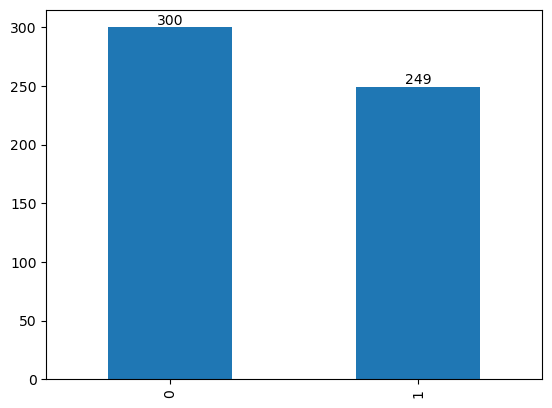

In [52]:
ax = health_data_new.stroke.value_counts().plot(kind="bar")
for i in ax.containers:
    print(ax.bar_label(i))

# label Encoding:

In [53]:
qual_columns

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [54]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [55]:
health_data_new['gender'] = Label_Encoder.fit_transform(health_data_new['gender'])
le_gender = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_gender

{'Female': 0, 'Male': 1, 'Other': 2}

In [56]:
health_data_new['ever_married'] = Label_Encoder.fit_transform(health_data_new['ever_married'])
le_married = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_married

{'No': 0, 'Yes': 1}

In [57]:
health_data_new['work_type'] = Label_Encoder.fit_transform(health_data_new['work_type'])
le_work = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_work

{'Govt_job': 0,
 'Never_worked': 1,
 'Private': 2,
 'Self-employed': 3,
 'children': 4}

In [58]:
health_data_new['Residence_type'] = Label_Encoder.fit_transform(health_data_new['Residence_type'])
le_Res = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_Res

{'Rural': 0, 'Urban': 1}

In [59]:
health_data_new['smoking_status'] = Label_Encoder.fit_transform(health_data_new['smoking_status'])
le_smoke = dict(zip(Label_Encoder.classes_, Label_Encoder.transform(Label_Encoder.classes_)))
le_smoke

{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}

In [60]:
health_data_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# Feature Scaling

In [61]:
quan_columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke'],
      dtype='object')

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
std_scaler = StandardScaler()

In [67]:
health_data_new['age'] = std_scaler.fit_transform(health_data_new[['age']])
health_data_new['avg_glucose_level'] = std_scaler.fit_transform(health_data_new[['avg_glucose_level']])
health_data_new['age'] = std_scaler.fit_transform(health_data_new[['age']])

In [64]:
health_data_new.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


# Independent and dependent variables:

In [65]:
x = health_data_new.drop('stroke',axis = 1)
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2


# Target Variables:

In [66]:
y = health_data_new['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
3148    0
4051    0
4511    0
2900    0
2298    0
Name: stroke, Length: 549, dtype: int64

# Splitting data into Training and Testing:

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state = 42)

In [80]:
x_train.shape, x_test.shape

((439, 10), (110, 10))

# Model building:

In [81]:
from sklearn.linear_model import LogisticRegression

In [112]:
log_reg = LogisticRegression(max_iter=1000)

# Model Training:

In [113]:
log_reg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# Model prediction:

In [114]:
y_pred = log_reg.predict(x_test)

# Model Evaluation:

In [115]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Accuracy of the model:

In [116]:
accuracy_score(y_test, y_pred)

0.7636363636363637

# precision

In [117]:
precision_score(y_test, y_pred)

0.7962962962962963

# recall

In [118]:
recall_score(y_test, y_pred)

0.7413793103448276

# confusion Matrix

In [119]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[41, 11],
       [15, 43]], dtype=int64)

<Axes: >

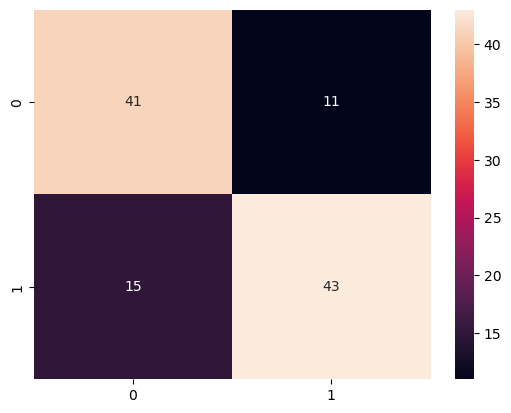

In [120]:
sns.heatmap(cm, annot = True)

In [121]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76        52
           1       0.80      0.74      0.77        58

    accuracy                           0.76       110
   macro avg       0.76      0.76      0.76       110
weighted avg       0.77      0.76      0.76       110



# Building multilple models

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# Building object of each model

In [190]:
Log_reg_model = LogisticRegression(max_iter = 1000)
Decision_tree_model = DecisionTreeClassifier()
Random_forest_model = RandomForestClassifier()
KNN_model = KNeighborsClassifier()
Svc_model = SVC()
Naive_bays_model = GaussianNB()

In [256]:
Log_reg_model = LogisticRegression(max_iter=1000)

model_list = [Log_reg_model, Decision_tree_model, 
              Random_forest_model, KNN_model, Svc_model, Naive_bays_model]

acc_list = []
model_name = []
for model in model_list:
    model.fit(x_test, y_test)
    y_predicted = model.predict(x_test)
    acc = accuracy_score(y_test, y_predicted)
    acc_list.append(acc)
    model_name.append(model.__class__.__name__)

In [257]:
model_df = pd.DataFrame({"model":model_name, "Accuracy":acc_list})
model_df

,model,Accuracy
0,LogisticRegression,0.809091
1,DecisionTreeClassifier,1.000000
2,RandomForestClassifier,1.000000
3,KNeighborsClassifier,0.736364
4,SVC,0.727273
5,GaussianNB,0.763636


# Model Validation - K-Fold Cross Validation

In [258]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [259]:
models = [Log_reg_model, Decision_tree_model,  
          Random_forest_model, KNN_model, 
          Svc_model, Naive_bays_model]

# Feature scaling (important for SVM, KNN, and Logistic Regression)
scaler = StandardScaler()
features = scaler.fit_transform(x)
labels = y

# Perform K-Fold Cross Validation
CV = 5
accu_list = []
ModelName = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring="accuracy", cv=CV)
    accu_list.append(accuracies.mean())
    ModelName.append(model_name)

In [260]:
model_df_cv = pd.DataFrame({"Model": ModelName, "Accuracy": accu_list})
print(model_df_cv)

                    Model  Accuracy
0      LogisticRegression  0.757748
1  DecisionTreeClassifier  0.712210
2  RandomForestClassifier  0.755930
3    KNeighborsClassifier  0.703069
4                     SVC  0.743186
5              GaussianNB  0.739433


# Best ML Model with hyperparameter tuning

In [261]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [262]:
Log_reg_model = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

# Perform GridSearchCV
grid_search = GridSearchCV(Log_reg_model, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000],
                         'solver': ['lbfgs', 'liblinear', 'saga']},
             scoring='accuracy')

In [263]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'C': 0.01, 'max_iter': 100, 'solver': 'lbfgs'}
Best Accuracy: 0.7705087572977483


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Initialize model
Random_forest_model = RandomForestClassifier()

# Define hyperparameter space
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(Random_forest_model, param_dist, n_iter=50, scoring='accuracy', cv=5, n_jobs=-1, random_state=42)
random_search.fit(x, y)

In [225]:
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}
Best Accuracy: 0.7850542118432027


In [ ]:
Random_forest_model.fit(x_train, y_train)

In [252]:
health_data_new.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
print("------------------Enter Patient's Data------------------")
Gender = int(input("Enter the Gender = "))
Age = int(input("Enter the Age = "))
Age_scaled = std_scaler.fit_transform([[Age]])[0][0]
HyperTension = int(input("Enter the HyperTension = "))
HeartDisease = int(input("Enter the HeartDisease = "))
WorkType = int(input("Enter the Work_Type = "))
EverMarried = int(input("Enter the EverMarried = "))
ResType = int(input("Enter the ResidentType = "))
AGL = float(input("Enter the Avg_Glucose_level = "))
Glucose_scaled = std_scaler.fit_transform([[AGL]])[0][0]
BMI = float(input("Enter the BMI = "))
bmi_scaled = std_scaler.fit_transform([[BMI]])[0][0]
SmokeStatus = int(input("Enter the Smoking_Status = "))

------------------Enter Patient's Data------------------


In [ ]:
Patients_Data = [Gender, Age_scaled, HyperTension, HeartDisease, WorkType,
                 EverMarried, ResType, Glucose_scaled, bmi_scaled, SmokeStatus]

prob = Random_forest_model.predict_proba([Patients_Data])
heart_stroke_prob = prob[0][1] * 100

In [ ]:
print("------- HEART STROKE MACHINE LEARNING MODEL ------------------")
print()
print(f"PROBABILITY of HEART STROKE in FUTURE = {heart_stroke_prob} %")